In [1]:
import pweave
pweave.rcParams['chunk']['defaultoptions'].update({'f_pos': 'tbp'})
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Probability Models and Distribution Functions

## Basic Probability

### Events and Sample Spaces:  Formal Presentation of Random Measurements

### Basic Rules of Operations with Events: Unions, Intersections

### Probabilities of Events

### Probability Functions for Random Sampling

### Conditional Probabilities and Independence of Events

### Bayes' Theorem and Its Application

## Random Variables and Their Distributions

### Discrete and Continuous Distributions

#### Discrete Random Variables

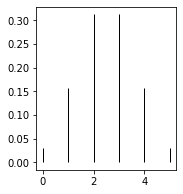

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

rv = stats.binom(5, 0.5)

x = list(range(0, 6))
df = pd.DataFrame({
    'x': x,
    'probability': rv.pmf(x),
})

fig, ax = plt.subplots(figsize=(2.5, 3))
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
plt.show()

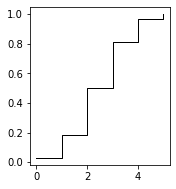

In [3]:
plt.subplots(figsize=(2.5, 2.9))
plt.step(x, rv.cdf(x), lw=1, label='frozen pmf', where='post', color='black')
plt.show()

#### Continuous Random Variables

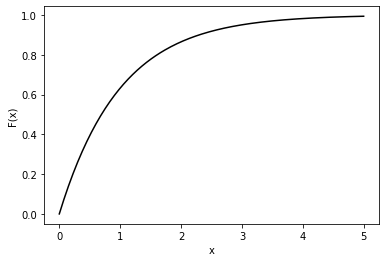

In [4]:
import numpy as np
x = np.linspace(0, 5, 200)

fig, ax = plt.subplots()
ax.plot(x, 1 - np.exp(-x), color='black')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()

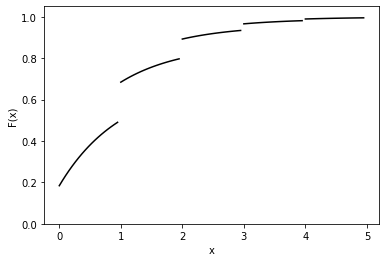

In [5]:
import numpy as np
import scipy.special
x = np.linspace(0, 5, 200)
fracSum = np.cumsum([1 / scipy.special.factorial(i) for i in range(6)])

fig, ax = plt.subplots()
for i in range(0, 5):
	x = np.linspace(i, i + 1, 20)[:-1]
	comp1 = 0.5 * (1 - np.exp(-x))
	comp2 = 0.5 * np.exp(-1) * np.array([fracSum[int(np.floor(xi))] for xi in x])
	ax.plot(x, comp1 + comp2, color='black')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_ylim(0, 1.05)
plt.show()

### Expected Values and Moments of Distributions

### The Standard Deviation, Quantiles, Measures of Skewness and Kurtosis

### Moment Generating Functions

## Families of Discrete Distribution

### The Binomial Distribution

In [6]:
x = list(range(0, 31))
rv = stats.binom(30, 0.6)
df = pd.DataFrame({
    'i': x,
    'b': rv.pmf(x),
    'B': rv.cdf(x),
})

In [7]:
table = df.round(4).iloc[8:28,]
s = table.style.hide(axis='index')
s = s.format(precision=4)
s = s.to_latex(column_format='ccc', hrules=True)
s = s.replace(' i ', ' $i$ ')
s = s.replace(' b ', ' $b(i;30,.6)$ ')
s = s.replace(' B ', ' $B(i;30,.6)$ ')
print(s)

\begin{tabular}{ccc}
\toprule
i & $b(i;30,.6)$ & $B(i;30,.6)$ \\
\midrule
8 & 0.0002 & 0.0002 \\
9 & 0.0006 & 0.0009 \\
10 & 0.0020 & 0.0029 \\
11 & 0.0054 & 0.0083 \\
12 & 0.0129 & 0.0212 \\
13 & 0.0269 & 0.0481 \\
14 & 0.0489 & 0.0971 \\
15 & 0.0783 & 0.1754 \\
16 & 0.1101 & 0.2855 \\
17 & 0.1360 & 0.4215 \\
18 & 0.1474 & 0.5689 \\
19 & 0.1396 & 0.7085 \\
20 & 0.1152 & 0.8237 \\
21 & 0.0823 & 0.9060 \\
22 & 0.0505 & 0.9565 \\
23 & 0.0263 & 0.9828 \\
24 & 0.0115 & 0.9943 \\
25 & 0.0041 & 0.9985 \\
26 & 0.0012 & 0.9997 \\
27 & 0.0003 & 1.0000 \\
\bottomrule
\end{tabular}



In [8]:
stats.binom(30, 0.6).ppf(0.5)

18.0

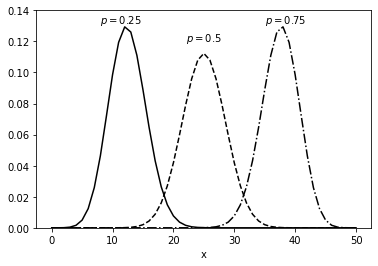

In [9]:
x = np.linspace(0, 50, 51)
distributions = pd.DataFrame({
    'x': x,
    'dist25': stats.binom(50, 0.25).pmf(x),
    'dist50': stats.binom(50, 0.5).pmf(x),
    'dist75': stats.binom(50, 0.75).pmf(x),
})
ax = distributions.plot(x='x', y='dist25', legend=False, color='black')
distributions.plot(x='x', y='dist50', legend=False, ax=ax, color='black', linestyle='--')
distributions.plot(x='x', y='dist75', legend=False, ax=ax, color='black', linestyle='-.')
ax.set_ylim(0, 0.14)
ax.text(8, 0.132, '$p=0.25$')
ax.text(22, 0.12, '$p=0.5$')
ax.text(35, 0.132, '$p=0.75$')
plt.show()

### The Hypergeometric Distribution

In [10]:
x = list(range(0, 8))
rv = stats.hypergeom(M=75, n=15, N=10)
df = pd.DataFrame({
    'j': x,
    'h': rv.pmf(x),
    'H': rv.cdf(x),
})

In [11]:
table = df.style
table = table.format(precision=4).hide(axis='index')
s = table.to_latex(column_format='ccc', hrules=True)
s = s.replace(' j ', ' $j$ ')
s = s.replace(' h ', ' $h(j;75,15,10)$ ')
s = s.replace(' H ', ' $H(j;75,15,10)$ ')
print(s)

\begin{tabular}{ccc}
\toprule
j & $h(j;75,15,10)$ & $H(j;75,15,10)$ \\
\midrule
0 & 0.0910 & 0.0910 \\
1 & 0.2675 & 0.3585 \\
2 & 0.3241 & 0.6826 \\
3 & 0.2120 & 0.8946 \\
4 & 0.0824 & 0.9770 \\
5 & 0.0198 & 0.9968 \\
6 & 0.0029 & 0.9997 \\
7 & 0.0003 & 1.0000 \\
\bottomrule
\end{tabular}



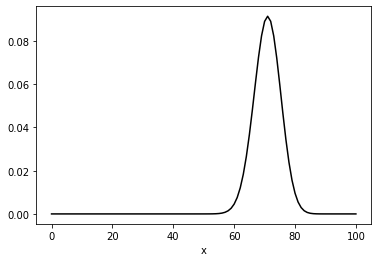

In [12]:
x = np.linspace(0, 100, 101)
rv = stats.hypergeom(1200, 850, 100)
distributions = pd.DataFrame({
    'x': x,
    'density': rv.pmf(x),
})
ax = distributions.plot(x='x', y='density', legend=False, color='black')
plt.show()

In [13]:
x = list(range(5, 21))
df = pd.DataFrame({
    'j': x,
    'h': stats.hypergeom(M=500, n=350, N=20).pmf(x),
    'b': stats.binom(20, 0.7).pmf(x),
})

In [14]:
table = df
s = table.style.hide(axis='index').format(precision=5).to_latex(column_format='ccc', hrules=True)
s = s.replace(' j ', ' $j$ ')
s = s.replace(' h ', ' $h(i;500,350,20)$ ')
s = s.replace(' b ', ' $b(i;20,0.7)$ ')
print(s)

\begin{tabular}{ccc}
\toprule
j & $h(i;500,350,20)$ & $b(i;20,0.7)$ \\
\midrule
5 & 0.00003 & 0.00004 \\
6 & 0.00016 & 0.00022 \\
7 & 0.00082 & 0.00102 \\
8 & 0.00333 & 0.00386 \\
9 & 0.01093 & 0.01201 \\
10 & 0.02928 & 0.03082 \\
11 & 0.06418 & 0.06537 \\
12 & 0.11491 & 0.11440 \\
13 & 0.16715 & 0.16426 \\
14 & 0.19559 & 0.19164 \\
15 & 0.18129 & 0.17886 \\
16 & 0.12999 & 0.13042 \\
17 & 0.06949 & 0.07160 \\
18 & 0.02606 & 0.02785 \\
19 & 0.00611 & 0.00684 \\
20 & 0.00067 & 0.00080 \\
\bottomrule
\end{tabular}



### The Poisson Distribution

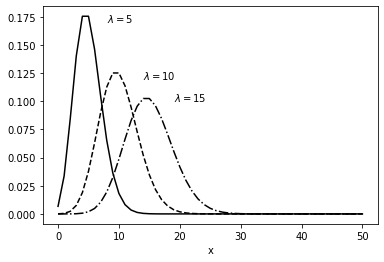

In [15]:
x = np.linspace(0, 50, 51)
distributions = pd.DataFrame({
    'x': x,
    'density5': stats.poisson(mu=5).pmf(x),
    'density10': stats.poisson(mu=10).pmf(x),
    'density15': stats.poisson(mu=15).pmf(x),
})
ax = distributions.plot(x='x', y='density5', color='black')
distributions.plot(x='x', y='density10', color='black', ls='--', ax=ax)
distributions.plot(x='x', y='density15', color='black', ls='-.', ax=ax)
ax.text(8, 0.17, '$\lambda=5$')
ax.text(14, 0.12, '$\lambda=10$')
ax.text(19, 0.10, '$\lambda=15$')
ax.get_legend().remove()
plt.show()

### The Geometric and Negative Binomial Distributions

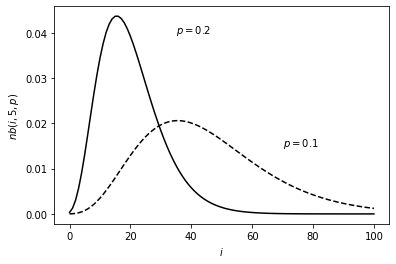

In [16]:
x = np.linspace(0, 100, 101)
distributions = pd.DataFrame({
    'x': x,
    'density_2': stats.nbinom(n=5, p=0.2).pmf(x),
    'density_1': stats.nbinom(n=5, p=0.1).pmf(x),
})
ax = distributions.plot(x='x', y='density_2', color='black')
distributions.plot(x='x', y='density_1', color='black', ls='--', ax=ax)
ax.text(35, 0.04, '$p=0.2$')
ax.text(70, 0.015, '$p=0.1$')
ax.set_xlabel('$i$')
ax.set_ylabel('$nb(i,5,p)$')
ax.get_legend().remove()
plt.show()

## Continuous Distributions

### The Uniform Distribution on the Interval $(a,b)$, $a<b$

### The Normal and Log-Normal Distributions

#### The Normal Distribution

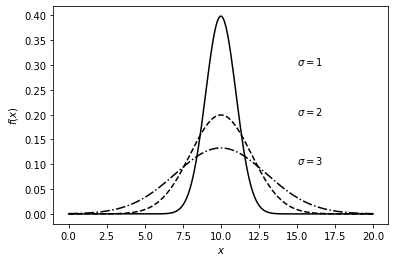

In [17]:
x = np.linspace(0, 20, 200)
distributions = pd.DataFrame({
    'x': x,
    'norm_1': stats.norm(loc=10, scale=1).pdf(x),
    'norm_2': stats.norm(loc=10, scale=2).pdf(x),
    'norm_3': stats.norm(loc=10, scale=3).pdf(x),
})
ax = distributions.plot(x='x', y='norm_1', legend=False, color='black')
distributions.plot(x='x', y='norm_2', legend=False, color='black', linestyle='--', ax=ax)
distributions.plot(x='x', y='norm_3', legend=False, color='black', linestyle='-.', ax=ax)
ax.text(15, 0.3, '$\sigma=1$')
ax.text(15, 0.2, '$\sigma=2$')
ax.text(15, 0.1, '$\sigma=3$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

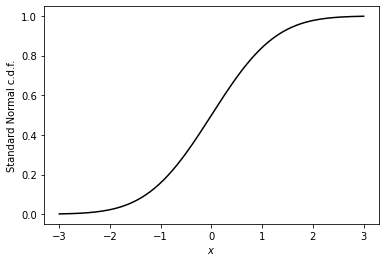

In [18]:
x = np.linspace(-3, 3, 200)
distributions = pd.DataFrame({
    'x': x,
    'norm_cdf': stats.norm(loc=0, scale=1).cdf(x),
})
ax = distributions.plot(x='x', y='norm_cdf', legend=False, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('Standard Normal c.d.f.')
plt.show()

In [19]:
stats.norm(loc=0, scale=1).cdf(1.5)

0.9331927987311419

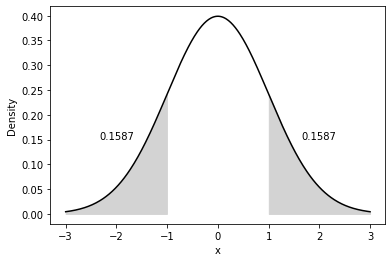

In [20]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c='black')

ax.fill_between(x[x>1], y[x>1], color="lightgrey")
ax.fill_between(x[x<-1], y[x<-1], color="lightgrey")

ax.text(-2, 0.15, f'{stats.norm(loc=0, scale=1).cdf(-1):.4f}', horizontalalignment='center')
ax.text(2, 0.15, f'{1 - stats.norm(loc=0, scale=1).cdf(1):.4f}', horizontalalignment='center')

ax.set_xlabel('x')
ax.set_ylabel('Density')
plt.show()

In [21]:
stats.norm(loc=0, scale=1).ppf(0.95)

1.6448536269514722

In [22]:
stats.norm(loc=10, scale=1.5).ppf(0.95)

12.467280440427208

In [23]:
stats.norm(loc=60.02, scale=0.048).cdf(60.1)

0.9522096477271818

#### The Log-Normal Distribution

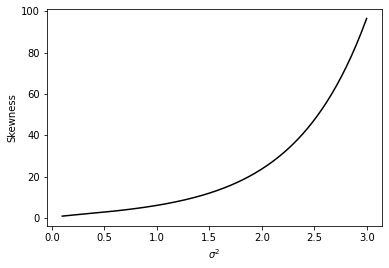

In [24]:
sigma = np.linspace(np.sqrt(0.1), np.sqrt(3), 200)

sigma_sq = np.square(sigma)
skewness = ((np.exp(3 * sigma_sq) - 3 * np.exp(sigma_sq) + 2) /
             np.power(np.exp(sigma_sq) - 1, 3 / 2))

fig, ax = plt.subplots()
ax.plot(sigma_sq, skewness, color='black')
ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('Skewness')
plt.show()

### The Exponential Distribution

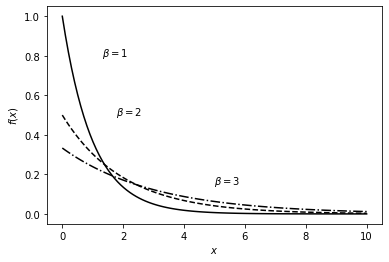

In [25]:
x = np.linspace(0, 10, 100)
distributions = pd.DataFrame({
    'x': x,
    'expon_1': stats.expon(scale=1).pdf(x),
    'expon_2': stats.expon(scale=2).pdf(x),
    'expon_3': stats.expon(scale=3).pdf(x),
})
ax = distributions.plot(x='x', y='expon_1', legend=False, color='black')
distributions.plot(x='x', y='expon_2', legend=False, color='black', linestyle='--', ax=ax)
distributions.plot(x='x', y='expon_3', legend=False, color='black', linestyle='-.', ax=ax)
ax.text(1.3, 0.8, r'$\beta = 1$')
ax.text(1.75, 0.5, r'$\beta = 2$')
ax.text(5, 0.15, r'$\beta = 3$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

### The Gamma and Weibull Distributions

In [26]:
stats.gamma(a=1, scale=1).cdf(1)

0.6321205588285577

In [27]:
from scipy.special import gamma
gamma(5)

24.0

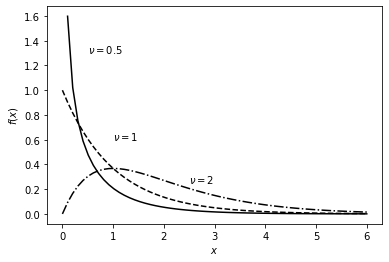

In [28]:
x = np.linspace(0, 6, 60)
distributions = pd.DataFrame({
    'x': x,
    'gamma_05': stats.gamma(a=0.5).pdf(x),
    'gamma_1': stats.gamma(a=1).pdf(x),
    'gamma_2': stats.gamma(a=2).pdf(x),
})
ax = distributions.plot(x='x', y='gamma_05', legend=False, color='black')
distributions.plot(x='x', y='gamma_1', legend=False, color='black', linestyle='--', ax=ax)
distributions.plot(x='x', y='gamma_2', legend=False, color='black', linestyle='-.', ax=ax)
ax.text(0.5, 1.3, r'$\nu = 0.5$')
ax.text(1, 0.6, r'$\nu = 1$')
ax.text(2.5, 0.25, r'$\nu = 2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

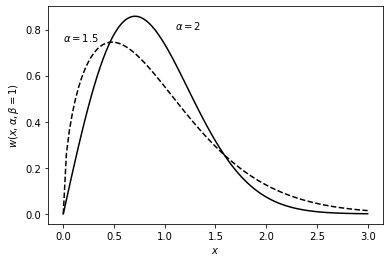

In [29]:
x = np.linspace(0, 3, 100)
distributions = pd.DataFrame({
    'x': x,
    'weibull_2': stats.weibull_min(c=2).pdf(x),
    'weibull_15': stats.weibull_min(c=1.5).pdf(x),
})
ax = distributions.plot(x='x', y='weibull_2', legend=False, color='black')
distributions.plot(x='x', y='weibull_15', legend=False, color='black', linestyle='--', ax=ax)
ax.text(1.1, 0.8, r'$\alpha = 2$')
ax.text(0, 0.75, r'$\alpha = 1.5$')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$w(x, \alpha, \beta=1)$')
plt.show()

### The Beta Distributions

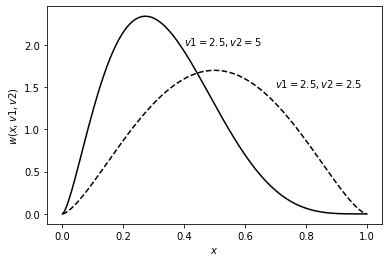

In [30]:
x = np.linspace(0, 1, 200)
distributions = pd.DataFrame({
    'x': x,
    'beta_5': stats.beta(a=2.5, b=5).pdf(x),
    'beta_25': stats.beta(a=2.5, b=2.5).pdf(x),
})
ax = distributions.plot(x='x', y='beta_5', legend=False, color='black')
distributions.plot(x='x', y='beta_25', legend=False, color='black', linestyle='--', ax=ax)
ax.text(0.4, 2, r'$v1=2.5, v2=5$')
ax.text(0.7, 1.5, r'$v1=2.5, v2=2.5$')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$w(x, v1, v2)$')
plt.show()

## Joint, Marginal and Conditional Distributions

### Joint and Marginal Distributions

### Covariance and Correlation

### Conditional Distributions

## Some Multivariate Distributions

### The Multinomial Distribution

### The Multi-hypergeometric Distribution

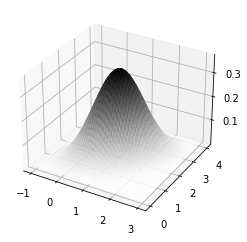

In [31]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.binary,)
plt.show()

### The Bivariate Normal Distribution

## Distribution of Order Statistics

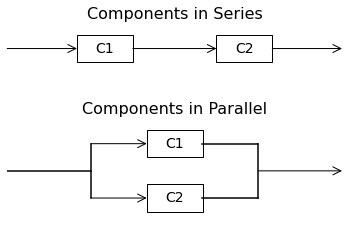

In [32]:
def labeledBox(ax, corner, sides, label):
    ax.add_patch(patch.Rectangle(corner, *sides, facecolor='none', edgecolor="black"))
    ax.annotate(label, (corner[0] + sides[0] / 2, corner[1] + sides[1] / 2), color='black',
                    fontsize=14, ha='center', va='center')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}

import matplotlib.patches as patch
fig, ax = plt.subplots(figsize=[6, 4])

y = 6.5
ax.text(3, y+1.75, 'Components in Series', va='center', ha='center', fontsize=16)
plt.annotate("", xy=(1.25, y+0.5), xytext=(0, y+0.5), arrowprops=prop)
labeledBox(ax, (1.25, y), (1, 1), 'C1')
plt.annotate("", xy=(3.75, y+0.5), xytext=(2.25, y+0.5), arrowprops=prop)
labeledBox(ax, (3.75, y), (1, 1), 'C2')
plt.annotate("", xy=(6, y+0.5), xytext=(4.75, y+0.5), arrowprops=prop)

y = 2.5
ax.text(3, y+2.25, 'Components in Parallel', va='center', ha='center', fontsize=16)
ax.plot((0, 1.5), (y, y), color='black')
ax.plot((1.5, 1.5), (y-1, y+1), color='black')
plt.annotate("", xy=(2.5, y-1), xytext=(1.5, y-1), arrowprops=prop)
plt.annotate("", xy=(2.5, y+1), xytext=(1.5, y+1), arrowprops=prop)
labeledBox(ax, (2.5, y+0.5), (1, 1), 'C1')
labeledBox(ax, (2.5, y-1.5), (1, 1), 'C2')
ax.plot((3.5, 4.5), (y-1, y-1), color='black')
ax.plot((3.5, 4.5), (y+1, y+1), color='black')
ax.plot((4.5, 4.5), (y-1, y+1), color='black')
plt.annotate("", xy=(6, y), xytext=(4.5, y), arrowprops=prop)

ax.set_xlim(0, 6)
ax.set_ylim(0, 8)
plt.axis('off')
plt.show()

## Linear Combinations of Random Variables

## Large Sample Approximations

### The Law of Large Numbers

### The Central Limit Theorem

### Some Normal Approximations

## Additional Distributions of Statistics of Normal Samples

### Distribution of the Sample Variance

### The ``Student'' $t$-statistic

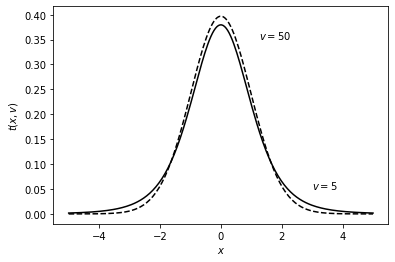

In [33]:
x = np.linspace(-5, 5, 200)
distributions = pd.DataFrame({
    'x': x,
    't_5': stats.t(df=5).pdf(x),
    't_50': stats.t(df=50).pdf(x),
})
ax = distributions.plot(x='x', y='t_5', legend=False, color='black')
distributions.plot(x='x', y='t_50', legend=False, color='black', linestyle='--', ax=ax)
ax.text(3, 0.05, r'$v=5$')
ax.text(1.25, 0.35, r'$v=50$')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$t(x, v)$')
plt.show()

### Distribution of the Variance Ratio

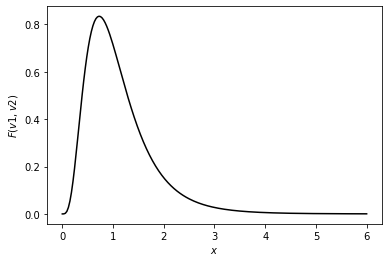

In [34]:
x = np.linspace(0, 6, 200)
distributions = pd.DataFrame({
    'x': x,
    'F': stats.f(10, 20).pdf(x),
})
ax = distributions.plot(x='x', y='F', legend=False, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel(r'$F(v1, v2)$')
plt.show()

## Chapter Highlights

## Exercises